In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_scatter(W_, xy, labels):
    for k, color in [(0, 'b'), (1, 'r')]:
        idx = labels.flatten() == k
        plt.scatter(xy[idx, 0], xy[idx, 1], c=color)

    x1 = np.linspace(-.1, 1.1)
    x2 = -W_[1] / W_[2] * x1  - W_[0] / W_[2]
    plt.plot(x1, x2, '--k')

    plt.grid()
    plt.show()

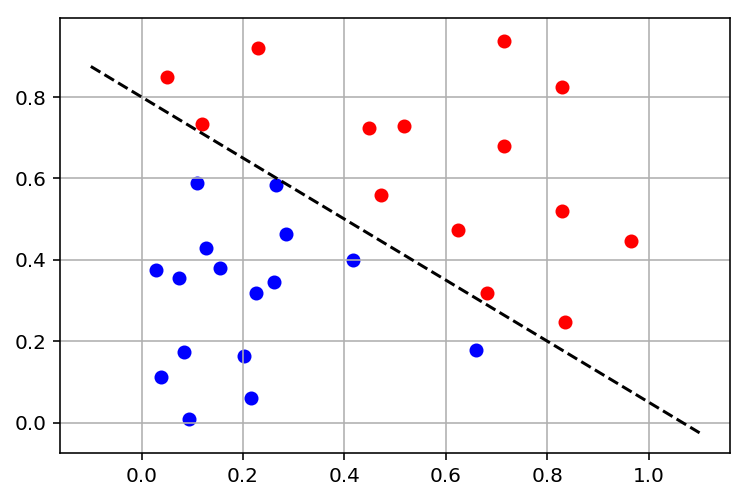

In [3]:
W = np.array([-4./5., 3./4., 1.0])

np.random.seed(327)
xy = np.random.rand(30,2)
labels = np.zeros(len(xy))
labels[W[0] + W[1] * xy[:,0] + W[2] * xy[:,1] > 0] = 1
plot_scatter(W, xy, labels)

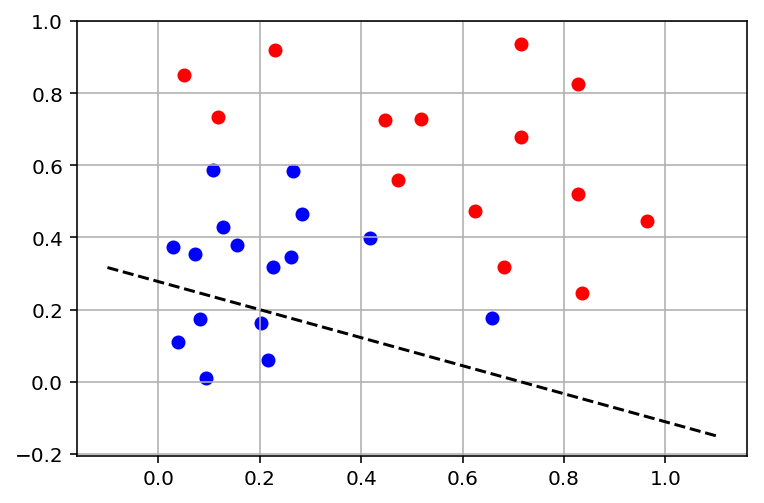

In [4]:
W0 = np.array([[-0.5, 0.7, 1.8]]).reshape(-1,1)
features = [np.array([1.0, xval, yval]) for xval, yval in xy]
plot_scatter(W0, xy, labels)

In [5]:
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

model = tf.sigmoid(tf.matmul(x, W))
loss = tf.reduce_mean(- y * tf.log(model) - (1 - y) * tf.log(1 - model))

lr = 0.1
MaxEpochs= 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        sess.run(train, feed_dict={x: features, y: labels.reshape(-1,1)})

    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_gd = curr_W.flatten()

(?, 3)
(?, 1)
(3, 1)
[-3.4043531   3.74721703  4.11845633] 0.2903407041572433


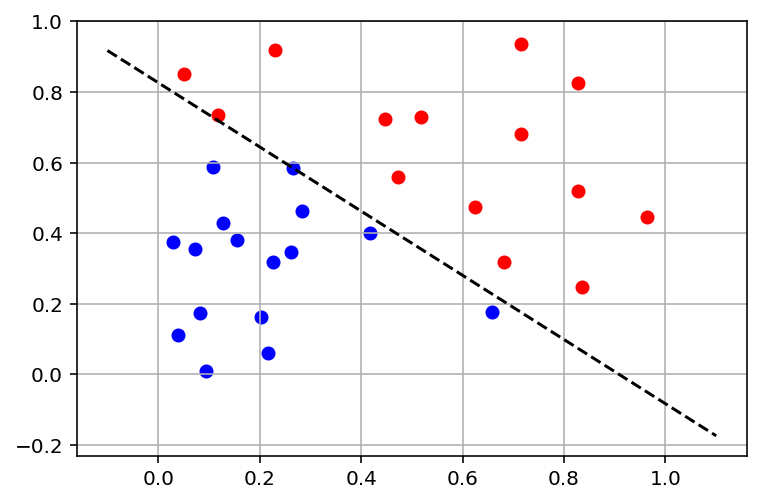

In [6]:
plot_scatter(W_gd, xy, labels)

## 1. 편리한 함수사용

`TensorFlow`에서 자주 사용하는 패턴들을 따로 만들어 놓은 함수들이 있습니다. 

가장 대표적인 것 중에 하나는 BInary Classification에서 사용하는 cross entropy 입니다.
```python
model = tf.sigmoid(tf.matmul(x,W))
loss = tf.reduce_sum(-y * tf.log(model) - (1 - y) * tf.log(1 - model))
```
매번 이렇게 쓰는 경우가 많아 사용자의 편리를 위해 [sigmoid_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)를 만들어 놓았습니다.
```python
model = tf.matmul(x,W)
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=y))
```

위의 2가지 표현은 모두 같은 방식이지만, 처음 접하게 되면 편리함보다는 어려움이 먼저 느껴집니다.

In [7]:
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))
W = tf.Variable(W0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)

model = tf.matmul(x, W)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=y))

lr = 0.1
MaxEpochs= 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        sess.run(train, feed_dict={x: features, y: labels.reshape(-1,1)})

    curr_W, curr_loss = sess.run([W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_W.flatten(), curr_loss)
W_gd1 = curr_W.flatten()

(?, 3)
(?, 1)
(3, 1)
[-3.4043531   3.74721703  4.11845633] 0.29034070415724333


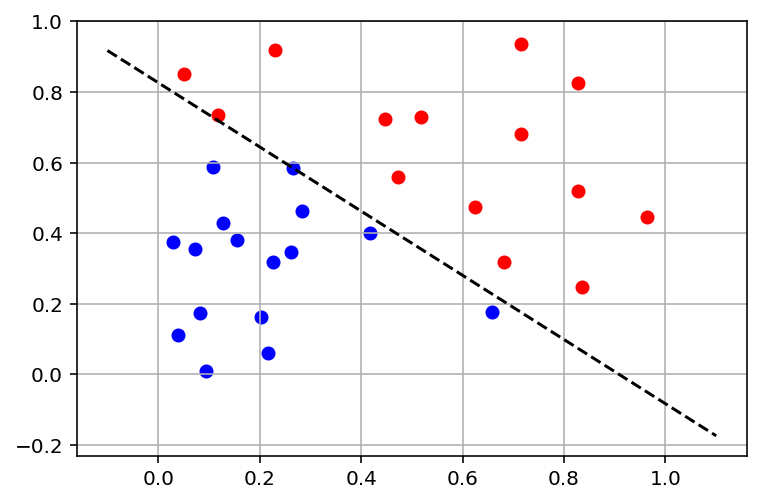

In [8]:
plot_scatter(W_gd, xy, labels)

## 2. Bias Term의 유무

구현하는 사람마다, bias term을 feature에 추가하는 경우도 있고, 따로 빼는 경우도 있습니다. 하지만, 따로 빼는 것이 일반적입니다.

In [9]:
features = np.array([[xval, yval] for xval, yval in xy])

In [10]:
W0 = np.array([[0.7, 1.8]]).reshape(-1,1)
b0 = np.array([-0.5]).reshape(-1,1)

In [11]:
x = tf.placeholder(tf.float64, shape=(None, len(W0)))
y = tf.placeholder(tf.float64, shape=(None, 1))

W = tf.Variable(W0, dtype=tf.float64)
b = tf.Variable(b0, dtype=tf.float64)

print(x.shape)
print(y.shape)
print(W.shape)
print(b.shape)

model = tf.matmul(x, W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=y))

lr = 0.1
MaxEpochs= 1000

optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpochs):
        sess.run(train, feed_dict={x: features, y: labels.reshape(-1,1)})

    curr_b, curr_W, curr_loss = sess.run([b, W, loss], feed_dict={x: features, y: labels.reshape(-1,1)})
    print(curr_b.flatten(), curr_W.flatten(), curr_loss)
W_gd2 = curr_W.flatten()
b_gd2 = curr_b.flatten()

(?, 2)
(?, 1)
(2, 1)
(1, 1)
[-3.4043531] [3.74721703 4.11845633] 0.2903407041572434


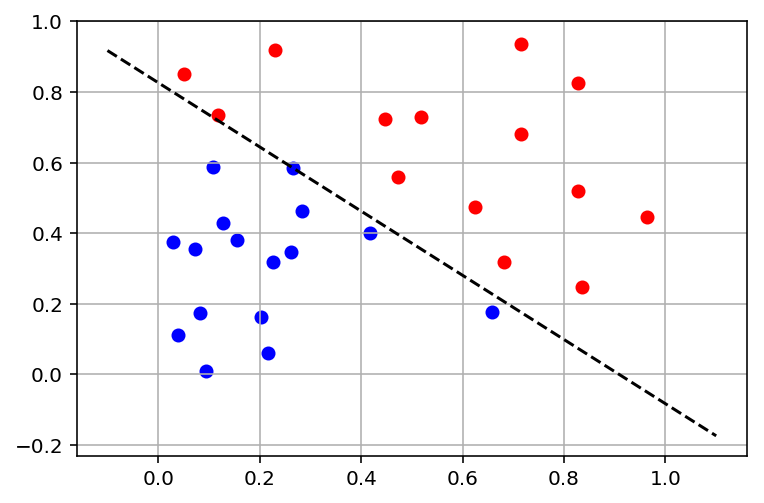

In [12]:
WW_gd2 = np.append(b_gd2, W_gd2)
plot_scatter(WW_gd2, xy, labels)